## Boston 주택 가격 예측 모델



---
- 보스턴 시의 주택 가격 데이터셋
- 주택의 여러 조건과 가격 정보가 포함되어 있음.

- 데이터셋 feature에 대한 설명

| Feature     | 설명                                  |
| ----------- | ----------------------------------- |
| **CRIM**    | 자치시별 1인당 범죄율                        |
| **ZN**      | 25,000 평방피트를 초과하는 거주지역의 비율          |
| **INDUS**   | 비소매 상업지역이 점유하고 있는 토지의 비율            |
| **CHAS**    | 찰스강 경계 여부 (강 근처: 1, 아니면: 0)         |
| **NOX**     | 10ppm당 일산화질소 농도                     |
| **RM**      | 주택 1가구당 평균 방의 개수                    |
| **AGE**     | 1940년 이전에 건축된 소유 주택의 비율             |
| **DIS**     | 5개 보스턴 직업센터까지의 접근성 지수               |
| **RAD**     | 방사형 도로까지의 접근성 지수                    |
| **TAX**     | 10,000달러당 재산세율                      |
| **PTRATIO** | 자치시별 학생/교사 비율                       |
| **B**       | 1000 × (Bk − 0.63)², Bk는 자치시별 흑인 비율 |
| **LSTAT**   | 모집단 중 하위계층(저소득층)의 비율 (%)            |
| **MEDV**    | 본인 소유 주택 가격의 중앙값 (단위: \$1,000)      |


### 데이터 로드 및 전처리

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean = train_data.mean(axis=0)
train_data = train_data - mean

# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std = train_data.std(axis=0)
train_data = train_data / std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
# [[YOUR CODE]]
test_data = test_data - mean
test_data = test_data / std

### 모델 구성 및 컴파일
- 주택 가격 예측을 위한 딥러닝 모델을 구성하고 컴파일하자
- Sequential() 함수를 이용한 Sequentail API 방법으로 딥러닝 모델을 구성해보자.

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
# [[YOUR CODE]]

from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Input(shape=(train_data.shape[1],)))  # 입력층
model.add(layers.Dense(64, activation='relu'))         # 은닉층 1
model.add(layers.Dense(32, activation='relu'))         # 은닉층 2
model.add(layers.Dense(1))                             # 출력층 (회귀이므로 활성화 함수 없음)

model.compile(optimizer='adam',
              loss='mse',                # 평균 제곱 오차
              metrics=['mae'])           # 평균 절대 오차


### 모델 학습
- epochs와 batch size는 자유롭게 설정하자.
- 모델 학습 후에는 모델 학습 결과를 시각화하자.

In [ ]:
# 문제 1-3: 예측을 위한 딥러닝 모델을 학습합니다.
# [[YOUR CODE]]
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 콜백 설정
early_stopping_cb = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

model_checkpoint_cb = ModelCheckpoint('best_model.h5',
                                      save_best_only=True,
                                      monitor='val_loss',
                                      mode='min')

# 모델 학습
history = model.fit(train_data, train_labels,
                    epochs=100,
                    batch_size=32,
                    validation_split=0.2,
                    callbacks=[early_stopping_cb, model_checkpoint_cb],
                    verbose=1)

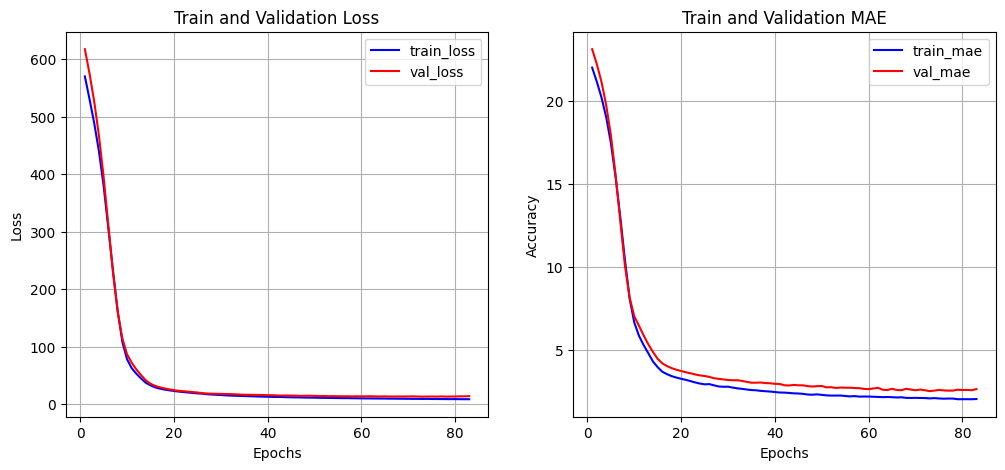

In [7]:
# 모델 학습 히스토리에서 loss, val_loss, mae, val_mae를 차트로 보여줍니다.
plt.style.use('default')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

mae = history_dict['mae']
val_mae = history_dict['val_mae']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, mae, 'b-', label='train_mae')
ax2.plot(epochs, val_mae, 'r-', label='val_mae')
ax2.set_title('Train and Validation MAE')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

| 항목       | 평가                           |
| -------- | ---------------------------- |
| 손실 수렴 속도 | 빠름 (10 epoch 내 급감)           |
| 과적합 여부   | 없음 또는 미미                     |
| 일반화 성능   | 우수 (val loss/mae 모두 안정적)     |
| 성능 수치    | MAE 기준 약 2.5\~3.5 → 좋은 회귀 성능 |


### 모델 평가 및 예측

In [8]:
# 문제 1-4: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]

test_loss, test_mae = model.evaluate(test_data, test_labels, verbose=1)

print(f"Test MSE (Loss): {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 20.3115 - mae: 3.1149
Test MSE (Loss): 26.3387
Test MAE: 3.3605


```
Train MAE: 3.11
Test MAE: 3.36
Test MSE (Loss): 26.34
```

- 훈련 데이터와 테스트 데이터에서의 MAE가 큰 차이를 보이지 않으며, 테스트 MAE 기준 평균 오차는 약 $3,360 수준임.
  - 모델이 과적합되지 않고, 새로운 데이터에 대해서도 안정적인 예측 성능을 유지하고 있음을 보여줌

- MSE 값도 낮은 편으로, 전반적으로 회귀 성능이 우수하고 실용적인 수준임

## Reuters 딥러닝 모델

---


### 데이터 로드 및 전처리

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras import callbacks
from tensorflow.keras import utils
from keras.datasets import reuters

In [10]:
# 문제 2-1: reuters 데이터셋을 로드하고, 훈련 데이터셋에서 25%를 검증 데이터셋으로 분리합니다.
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

train_data, val_data, train_labels, val_labels = train_test_split(
    train_data, train_labels, test_size=0.25
)

# 훈련, 검증, 테스트 데이터와 레이블 종류가 몇 개인지 출력합니다.
print(len(train_data))
print(len(val_data))
print(len(test_data))
print(len(set(train_labels)))

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
6736
2246
2246
46


- 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행
- 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환

In [11]:
# 문제 2-2: 텍스트 데이터의 전처리를 위해서 각 데이터셋마다 원-핫 인코딩을 수행합니다.
import numpy as np
from tensorflow.keras.utils import to_categorical

def one_hot_encoding(data, dim=10000):
  results = np.zeros((len(data), dim))
  for i, d in enumerate(data):
    results[i, d] = 1.
  return results

x_train = one_hot_encoding(train_data)
x_val = one_hot_encoding(val_data)
x_test = one_hot_encoding(test_data)

# 레이블 데이터들은 범주형 형태로 to_categorical() 함수를 사용해 변환합니다.
y_train = to_categorical(train_labels)
y_val = to_categorical(val_labels)
y_test = to_categorical(test_labels)

### 모델 구성 및 컴파일 + 학습

#### 1. BatchNormalization + Dropout(50%) + 은닉층 1개

In [38]:
model = models.Sequential()
model.add(layers.Input(shape=(10000,)))                 # 입력층 (원-핫 인코딩된 벡터)

model.add(layers.Dense(64))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

# 출력층
model.add(layers.Dense(46, activation='softmax'))       # 클래스 수: 46개

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [39]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_19 (Dense)                │ (None, 64)             │       640,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 643,310 (2.45 MB)

 Trainable params: 643,182 (2.45 MB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping_cb, model_checkpoint_cb],
                    verbose=1)

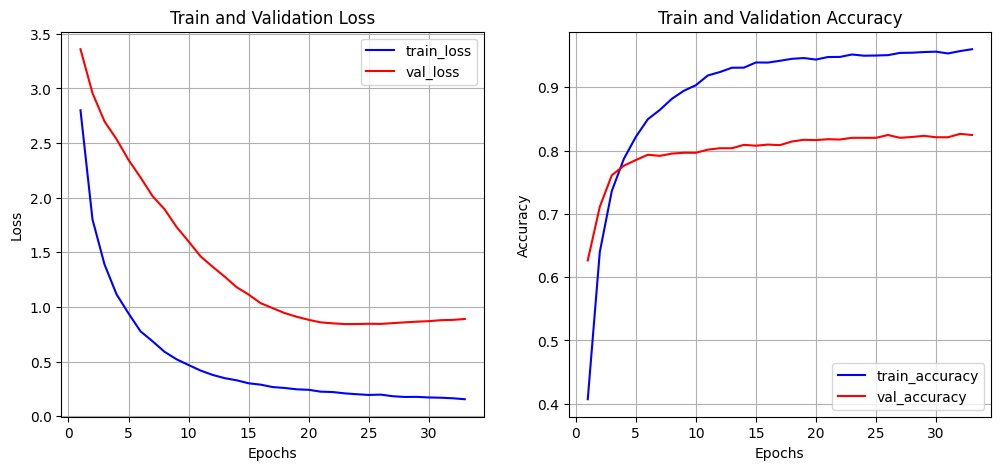

In [41]:
plt.style.use('default')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [42]:
# 가장 성능 좋았던 epoch (val_loss 기준)
best_epoch = np.argmin(history.history['val_loss'])

# 해당 epoch의 지표 출력
print(f"Best Epoch: {best_epoch + 1}")
print(f" - Train Loss: {history.history['loss'][best_epoch]:.4f}")
print(f" - Val Loss: {history.history['val_loss'][best_epoch]:.4f}")
print(f" - Train Accuracy: {history.history['accuracy'][best_epoch]:.4f}")
print(f" - Val Accuracy: {history.history['val_accuracy'][best_epoch]:.4f}")

Best Epoch: 23
 - Train Loss: 0.2100
 - Val Loss: 0.8440
 - Train Accuracy: 0.9518
 - Val Accuracy: 0.8201


#### 2. BatchNormalization + Dropout(50%) + 은닉층 2개

In [43]:
model = models.Sequential()
model.add(layers.Input(shape=(10000,)))                 # 입력층 (원-핫 인코딩된 벡터)

model.add(layers.Dense(64))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(64))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

# 출력층
model.add(layers.Dense(46, activation='softmax'))       # 클래스 수: 46개

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [44]:
model.summary()

Model: "sequential_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_21 (Dense)                │ (None, 64)             │       640,064 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_12          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_12 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 46)             │         2,990 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 647,726 (2.47 MB)

 Trainable params: 647,470 (2.47 MB)

 Non-trainable params: 256 (1.00 KB)

In [45]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=512,
                    validation_data=(x_val, y_val),
                    callbacks=[early_stopping_cb, model_checkpoint_cb],
                    verbose=1)

Epoch 1/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 202ms/step - accuracy: 0.0680 - loss: 4.0916 - val_accuracy: 0.5601 - val_loss: 3.5884
Epoch 2/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.3732 - loss: 2.8693 - val_accuracy: 0.6385 - val_loss: 3.2799
Epoch 3/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5360 - loss: 2.2782 - val_accuracy: 0.6879 - val_loss: 2.9749
Epoch 4/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.6148 - loss: 1.9275 - val_accuracy: 0.7084 - val_loss: 2.7009
Epoch 5/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6569 - loss: 1.6922 - val_accuracy: 0.7195 - val_loss: 2.4617
Epoch 6/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.6836 - loss: 1.4720 - val_accuracy: 0.7271 - val_loss: 2.2630
Epoch 7/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.7046 - loss: 1.3406 - val_accuracy: 0.7369 - val_loss: 2.0897
Epoch 8/50
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7139 - loss: 1.2917 - val_accuracy: 0.7449 - 

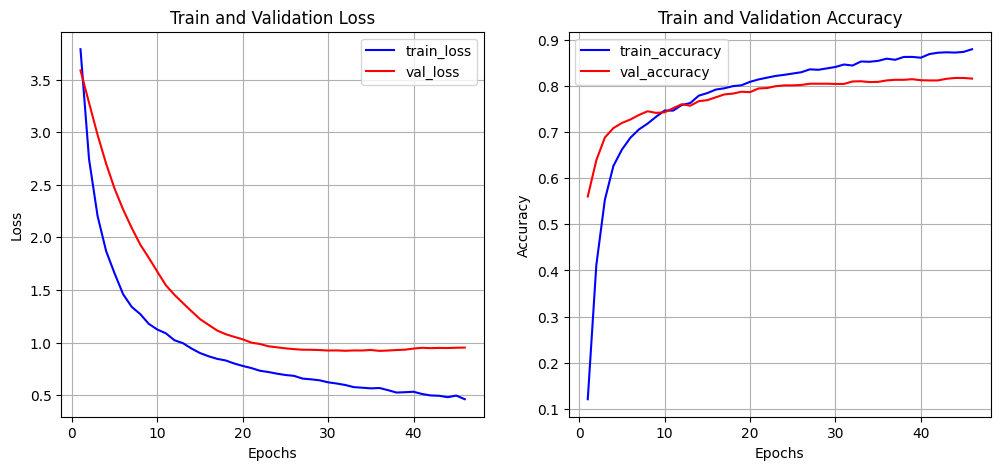

In [46]:
plt.style.use('default')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

In [48]:
# 가장 성능 좋았던 epoch (val_loss 기준)
best_epoch = np.argmin(history.history['val_loss'])

# 해당 epoch의 지표 출력
print(f"Best Epoch: {best_epoch + 1}")
print(f" - Train Loss: {history.history['loss'][best_epoch]:.4f}")
print(f" - Val Loss: {history.history['val_loss'][best_epoch]:.4f}")
print(f" - Train Accuracy: {history.history['accuracy'][best_epoch]:.4f}")
print(f" - Val Accuracy: {history.history['val_accuracy'][best_epoch]:.4f}")

Best Epoch: 36
 - Train Loss: 0.5674
 - Val Loss: 0.9206
 - Train Accuracy: 0.8588
 - Val Accuracy: 0.8117


### 모델 평가 및 예측

| 항목             | 모델 1<br>(은닉 1개)           | 모델 2<br>(은닉 2개) |
| -------------- | ------------------------- | --------------- |
| **Best Epoch** | 23                        | 36              |
| **Train Loss** | **0.2100**                | 0.5674          |
| **Val Loss**   | **0.8440**                | 0.9206          |
| **Train Acc.** | **0.9518**                | 0.8588          |
| **Val Acc.**   | **0.8201**                | 0.8117          |
| **과적합 정도**     | **큼 (Train vs Val 간격 큼)** | **적음 (간격 좁음)**  |

- 성능 지표는 1이 좋았으나 과적합 위험이 있다.
  - 살짝 값이 낮더라도 과적합이 적은 모델이 장기적으로 더 신뢰할 수 있다고 판단하여 2를 최종 선택하였다.


In [49]:
# 문제 2-5: 테스트 데이터셋을 이용해 모델을 평가합니다.
# [[YOUR CODE]]

# 테스트셋 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=1)

# 결과 출력
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

71/71 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7811 - loss: 1.0814
Test Loss: 1.0972
Test Accuracy: 0.7760


## CIFAR10 딥러닝 모델

---

- CIFAR10 데이터셋은 32x32 픽셀의 6,000개 컬러 이미지로 구성
- 데이터셋의 각 이미지는 10개의 클래스로 라벨링되어 있음

### 데이터 로드 및 전처리

In [50]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from tensorflow.keras import models, layers
from tensorflow.keras.datasets import cifar10

In [51]:
# 문제 3-1: cifar10 데이터셋을 로드하고, 훈련 데이터셋에서 20%를 검증 데이터셋으로 분리합니다.
from tensorflow.keras.datasets import cifar10
from sklearn.model_selection import train_test_split

# 1. 데이터 로드
(x_train_full, y_train_full), (x_test, y_test) = cifar10.load_data()

# 2. 훈련 데이터에서 20%를 검증용으로 분리
x_train, x_val, y_train, y_val = train_test_split(
    x_train_full, y_train_full, test_size=0.2, random_state=42
)

# 3. 각 데이터셋 정보 출력
print("전체 학습 데이터: {} 레이블: {}".format(x_train_full.shape, y_train_full.shape))
print("학습 데이터: {} 레이블: {}".format(x_train.shape, y_train.shape))
print("검증 데이터: {} 레이블: {}".format(x_val.shape, y_val.shape))
print("테스트 데이터: {} 레이블: {}".format(x_test.shape, y_test.shape))



170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
전체 학습 데이터: (50000, 32, 32, 3) 레이블: (50000, 1)
학습 데이터: (40000, 32, 32, 3) 레이블: (40000, 1)
검증 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)
테스트 데이터: (10000, 32, 32, 3) 레이블: (10000, 1)


In [52]:
# cifar10의 분류에 해당하는 'airplane', 'automobile', 'bird', 'cat', 'deer',
# 'dog', 'frog', 'horse', 'ship', 'truck'를 class_name으로 정의합니다.
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

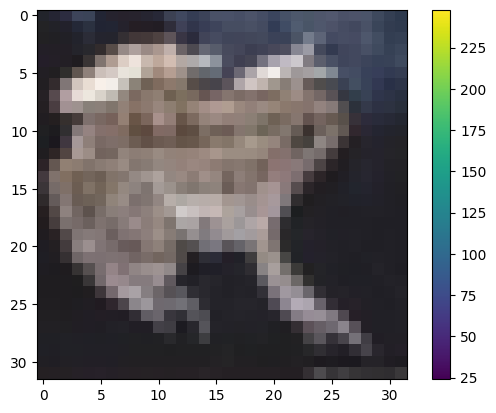

In [55]:
# 훈련 데이터의 0번째인 x_train[0]를 이미지로 시각화합니다.
plt.style.use('default')

plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.show()

In [54]:
# 훈련, 검증, 테스트 데이터의 형태(shape)을 출력합니다.
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [56]:
# 문제 3-2: 훈련, 검증, 테스트 데이터의 형태(shape)을 32 * 32 * 3 = 3072로 변형합니다.
x_train = x_train.reshape(-1, 32 * 32 * 3)
x_val = x_val.reshape(-1, 32 * 32 * 3)
x_test = x_test.reshape(-1, 32 * 32 * 3)

print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(40000, 3072)
(10000, 3072)
(10000, 3072)


In [57]:
# 훈련, 검증, 테스트 데이터를 255로 나누어 0~1 사이의 값으로 변환합니다.
x_train = x_train / 255.
x_val = x_val / 255.
x_test = x_test / 255.

### 모델 구성 및 컴파일 + 학습

#### 1. BatchNormalization + Dropout (50%)



In [71]:
from tensorflow.keras import models, layers

model = models.Sequential()

# 입력층
model.add(layers.Input(shape=(3072,)))
model.add(layers.Dense(512))
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

# 출력층 (10개 클래스 분류)
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [72]:
model.summary()

Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,580,554 (6.03 MB)

 Trainable params: 1,579,530 (6.03 MB)

 Non-trainable params: 1,024 (4.00 KB)

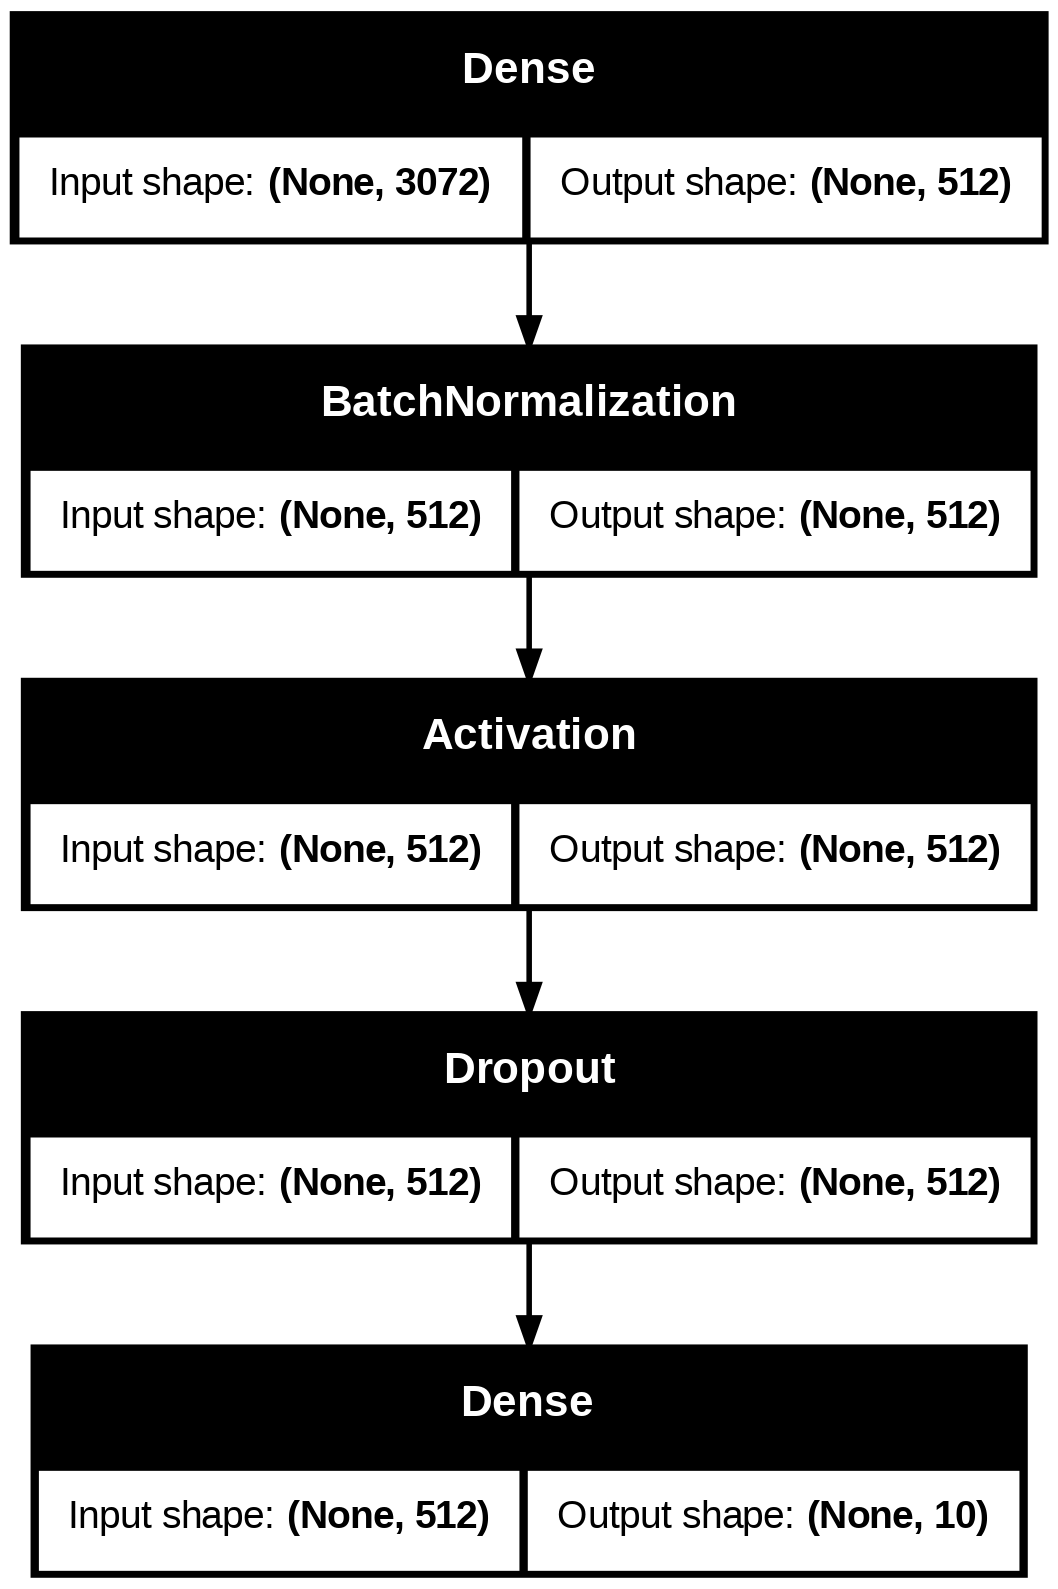

In [73]:
utils.plot_model(model, show_shapes=True)

In [74]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val),
                    callbacks=[model_checkpoint_cb, early_stopping_cb],
                    verbose=1)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.3181 - loss: 2.0588 - val_accuracy: 0.3664 - val_loss: 1.7749
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4111 - loss: 1.6753 - val_accuracy: 0.3693 - val_loss: 1.7756
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4484 - loss: 1.5613 - val_accuracy: 0.3867 - val_loss: 1.8036
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4682 - loss: 1.5170 - val_accuracy: 0.3911 - val_loss: 1.7478
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4876 - loss: 1.4709 - val_accuracy: 0.4518 - val_loss: 1.5725
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5002 - loss: 1.4301 - val_accuracy: 0.4372 - val_loss: 1.5823
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5081 - loss: 1.4161 - val_accuracy: 0.4533 - val_loss: 1.5543
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5188 - loss: 1.3819 - val_accuracy: 0.

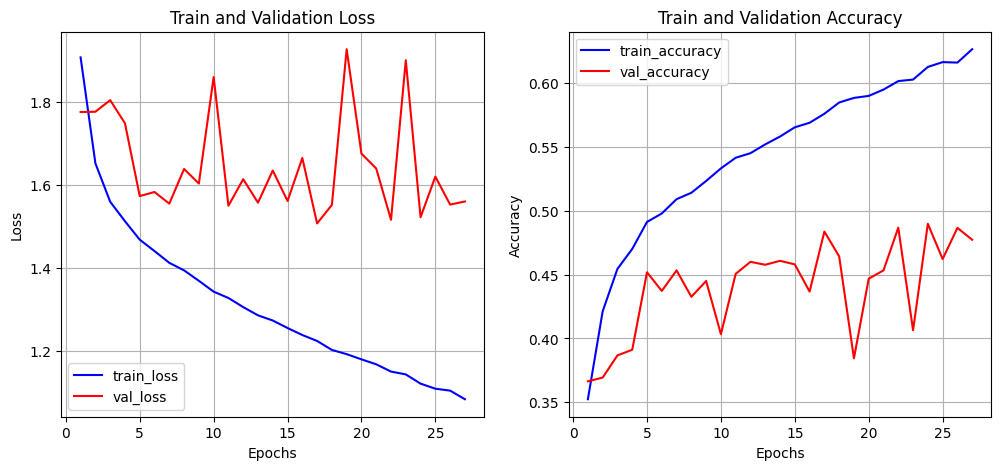

In [75]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# [[YOUR CODE]]

plt.style.use('default')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

모델이 훈련 데이터에만 잘 맞고 검증에는 일반화 x
-> 과적합...

In [76]:
# 가장 성능 좋았던 epoch (val_loss 기준)
best_epoch = np.argmin(history.history['val_loss'])

# 해당 epoch의 지표 출력
print(f"Best Epoch: {best_epoch + 1}")
print(f" - Train Loss: {history.history['loss'][best_epoch]:.4f}")
print(f" - Val Loss: {history.history['val_loss'][best_epoch]:.4f}")
print(f" - Train Accuracy: {history.history['accuracy'][best_epoch]:.4f}")
print(f" - Val Accuracy: {history.history['val_accuracy'][best_epoch]:.4f}")

Best Epoch: 17
 - Train Loss: 1.2236
 - Val Loss: 1.5067
 - Train Accuracy: 0.5760
 - Val Accuracy: 0.4837


#### 2. 1. BatchNormalization + Dropout (50%) + 규제(l2)

In [78]:
from tensorflow.keras import models, layers, regularizers

model = models.Sequential()

# 입력층 + 은닉층 (L2 규제 적용)
model.add(layers.Input(shape=(3072,)))
model.add(layers.Dense(512,
                       kernel_regularizer=regularizers.l2(0.001)))  # ← L2 적용
model.add(layers.BatchNormalization())
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))

# 출력층 (10개 클래스 분류)
model.add(layers.Dense(10, activation='softmax'))

# 모델 컴파일
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [79]:
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_30 (Dense)                │ (None, 512)            │     1,573,376 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_17          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,580,554 (6.03 MB)

 Trainable params: 1,579,530 (6.03 MB)

 Non-trainable params: 1,024 (4.00 KB)

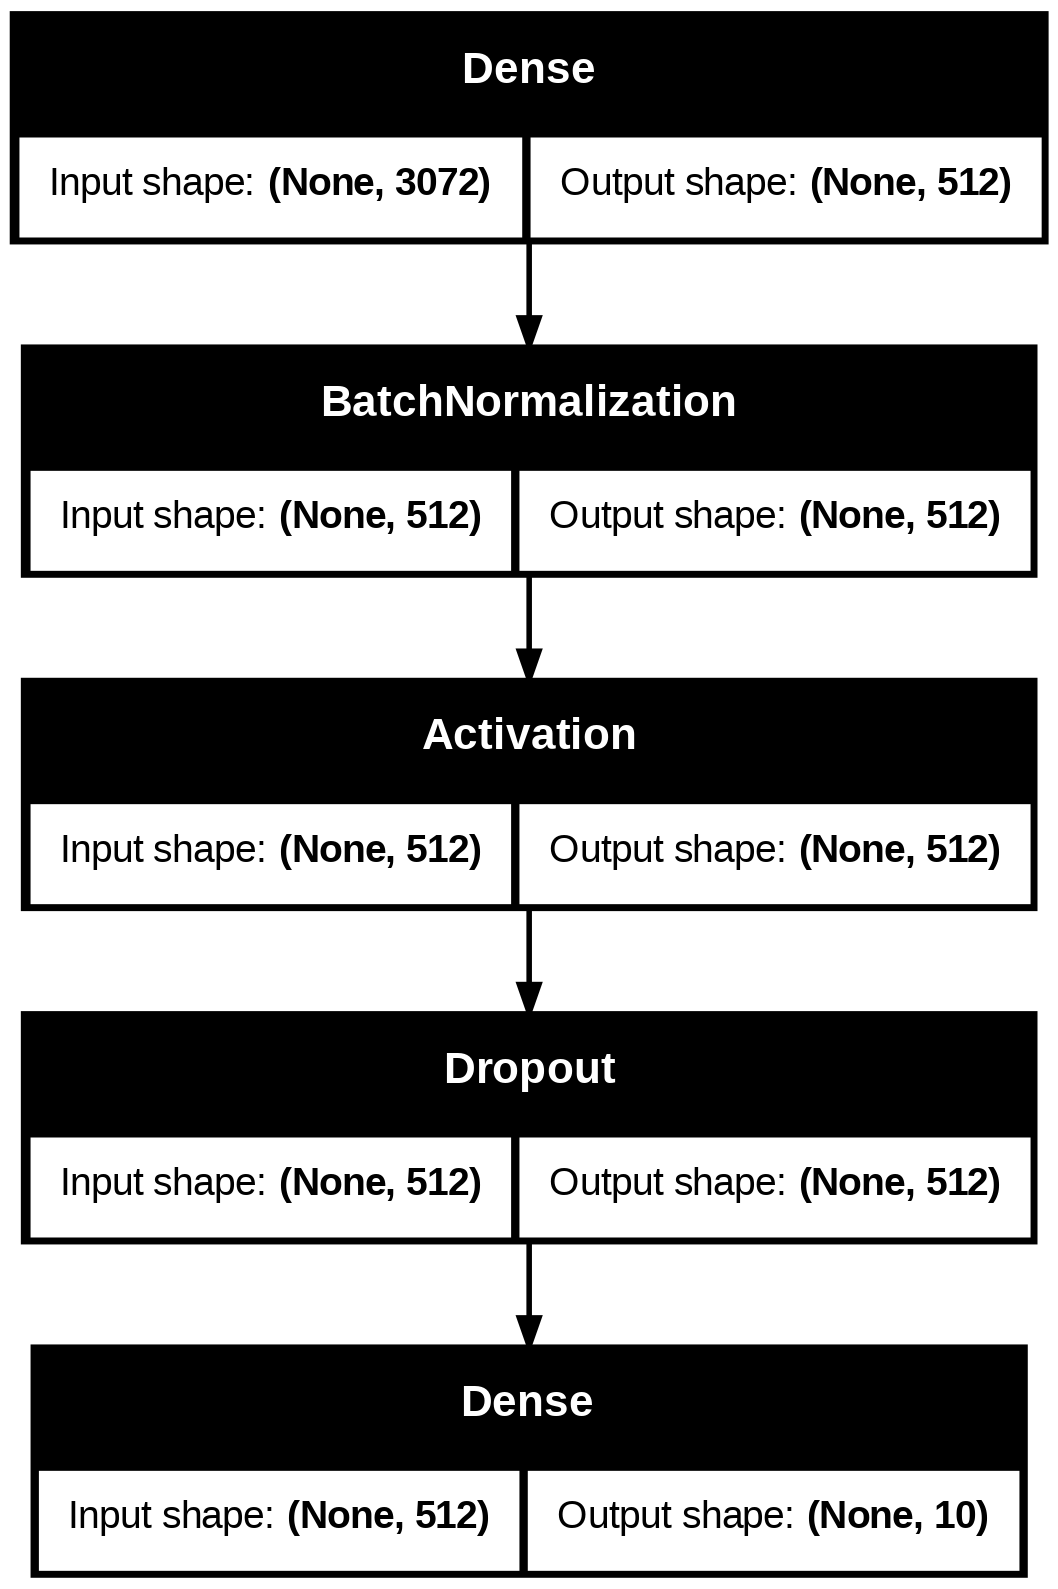

In [80]:
utils.plot_model(model, show_shapes=True)

In [81]:
history = model.fit(x_train, y_train,
                    epochs=50,
                    batch_size=128,
                    validation_data=(x_val, y_val),
                    callbacks=[model_checkpoint_cb, early_stopping_cb],
                    verbose=1)

Epoch 1/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.3067 - loss: 2.8678 - val_accuracy: 0.3437 - val_loss: 2.3308
Epoch 2/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4045 - loss: 2.0423 - val_accuracy: 0.3715 - val_loss: 2.0203
Epoch 3/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4255 - loss: 1.8411 - val_accuracy: 0.3516 - val_loss: 1.9888
Epoch 4/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.4334 - loss: 1.7858 - val_accuracy: 0.3362 - val_loss: 2.3828
Epoch 5/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4371 - loss: 1.7834 - val_accuracy: 0.3445 - val_loss: 2.0210
Epoch 6/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4362 - loss: 1.7914 - val_accuracy: 0.3301 - val_loss: 2.2211
Epoch 7/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.4356 - loss: 1.7825 - val_accuracy: 0.3763 - val_loss: 1.9045
Epoch 8/50
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4288 - loss: 1.7894 - val_accuracy: 0

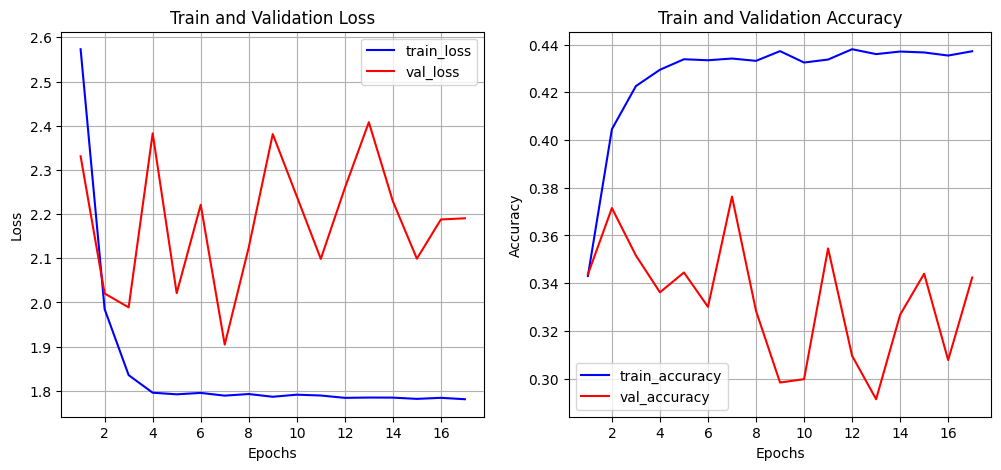

In [82]:
# 문제 3-5: 학습 히스토리의 `loss`, `val_loss`, `accuracy`, `val_accuracy`를 차트로 시각화합니다.
# [[YOUR CODE]]

plt.style.use('default')

history_dict = history.history

loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss) + 1)
fig = plt.figure(figsize=(12, 5))

ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(epochs, loss, 'b-', label='train_loss')
ax1.plot(epochs, val_loss, 'r-', label='val_loss')
ax1.set_title('Train and Validation Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss')
ax1.grid()
ax1.legend()

accuracy = history_dict['accuracy']
val_accuracy = history_dict['val_accuracy']

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(epochs, accuracy, 'b-', label='train_accuracy')
ax2.plot(epochs, val_accuracy, 'r-', label='val_accuracy')
ax2.set_title('Train and Validation Accuracy')
ax2.set_xlabel('Epochs')
ax2.set_ylabel('Accuracy')
ax2.grid()
ax2.legend()

plt.show()

-> 여전히 과적합...

### 모델 평가 및 예측

In [77]:
# 1번

model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5003 - loss: 1.4906


[1.4950342178344727, 0.49309998750686646]

In [84]:
# 2번

model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3799 - loss: 1.8936


[1.8998138904571533, 0.3747999966144562]

-> l2 규제가 없는 모델이 더 나은 걸 알 수 있다.